# Analysing house prices
* jghgh

In [4]:
#Inviting Party People
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Load datasets for demonstrations
house_data = pd.read_csv("csv-txt/train.csv")

In [5]:
#look at first 5 rows using .head()
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#look at last 5 rows using .tail()
house_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [9]:
house_data.shape

(1460, 81)

In [8]:
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
#Peek... head or tail
house_data['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [12]:
# Descriptive statistics summary
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


/Users/rahamahdavi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


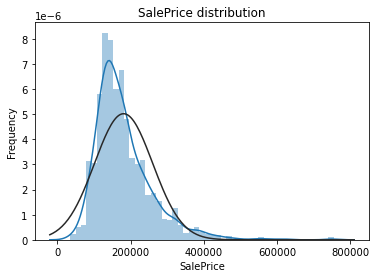

In [13]:
from scipy.stats import norm
# Distribution plot
def distribution_plot(data):
    sns.distplot(data, fit=norm)
    plt.ylabel('Frequency')
    plt.title(f'{data.name} distribution')
    
distribution_plot(house_data['SalePrice'])

In [16]:
#skewness and kurtosis
print("Skewness: %f" % house_data['SalePrice'].skew())
print("Kurtosis: %f" % house_data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [17]:
OverallQual = house_data['OverallQual'].astype('category')

#Peek... head or tail
OverallQual.head()

0    7
1    6
2    7
3    7
4    8
Name: OverallQual, dtype: category
Categories (10, int64): [1, 2, 3, 4, ..., 7, 8, 9, 10]

In [ ]:
# Descriptive statistics summary
OverallQual.describe()

# ghrhyrhy

In [ ]:
column = OverallQual;
print('Column Name:{}\nCardinality:{}\nValues:{}'.format(column.name,column.nunique(), column.unique()))

In [ ]:
OverallQual.value_counts()

In [ ]:
def getPlotsforCatFeature(series,figX=15,figY=7):
    f,ax=plt.subplots(1,2,figsize=(figX,figY))
    series.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
    ax[0].set_title(f'{series.name}')
    ax[0].set_ylabel('')
    sns.countplot(series,ax=ax[1])
    ax[1].set_title(f'Count plot for {series.name}')
    plt.show()
    
getPlotsforCatFeature(OverallQual,15,5)

In [ ]:
#scatter plot
house_data.plot.scatter(x='GrLivArea', y='SalePrice');

''' Alternatively you could use following function 
def scatterplot(seriesX,seriesY):
    data = pd.concat([seriesY, seriesX], axis=1)
    data.plot.scatter(x=seriesX.name, y=seriesY.name)
    
scatterplot(house_data['GrLivArea'],house_data['SalePrice'])
'''

In [ ]:
#Box plot
num = 'SalePrice'
cat = 'OverallQual'
df  =  house_data

data = pd.concat([df[num], df[cat]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=cat, y=num, data=data)
fig.axis(ymin=0, ymax=800000);

In [ ]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

def fillMissingCatColumns(data,categorical):
    for c in categorical:
        data[c] = data[c].astype('category')
        if data[c].isnull().any():
            data[c] = data[c].cat.add_categories(['MISSING'])
            data[c] = data[c].fillna('MISSING')
    
def getboxPlots(data,var,categorical):
    fillMissingCatColumns(data,categorical)
    f = pd.melt(data, id_vars=var, value_vars=categorical)
    g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
    g = g.map(boxplot, "value", var)
    

data = house_data.copy()
categorical = [f for f in data.columns if data.dtypes[f] == 'object']    
getboxPlots(data,'SalePrice',categorical)

In [ ]:
def getCorrHeatMap(dataFrame,figSize=[12,9]):
    corrmat = dataFrame.corr()
    f, ax = plt.subplots(figsize=(figSize[0], figSize[1]))
    sns.heatmap(corrmat, vmax=.8, square=True);

getCorrHeatMap(house_data)

In [ ]:
def getZoomedCorrHeatMap(dataFrame,featureCount,target,figSize=[12,9]):
    corrmat = dataFrame.corr()
    cols = corrmat.nlargest(featureCount, target)[target].index
    f , ax = plt.subplots(figsize = (figSize[0],figSize[1]))
    cm = np.corrcoef(dataFrame[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()

getZoomedCorrHeatMap(house_data,10,'SalePrice',[10,8])

In [ ]:
def getMissingValuesInfo(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
    temp = pd.concat([total, percent], axis = 1,keys= ['Total Missing Count', '% of Total Observations'])
    temp.index.name ='Feature Name'
    return temp.loc[(temp['Total Missing Count'] > 0)]

getMissingValuesInfo(house_data)

In [ ]:
# Visualizing missing counts
missing = house_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
plt.subplots(figsize=(15,5))
missing.plot.bar()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(house_data.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

In [ ]:
def distplots(data,num_features):
    f = pd.melt(data, value_vars=num_features)
    g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
    g = g.map(sns.distplot, "value")
    

num_features = house_data.select_dtypes(include=['int64','float64'])
distplots(house_data,num_features)

In [ ]:
num_features = house_data.select_dtypes(include=['int64','float64'])
num_features.describe()

In [ ]:
categorical_features = house_data.select_dtypes(include='object')
categorical_features.describe()

In [ ]:
def printUniqueValues(df,cardinality=1000):
    n = df.select_dtypes(include=object)
    for column in n.columns:
        uCount = df[column].nunique()
        if uCount<=cardinality:
            print('{:>12}: {} {}'.format(column,uCount, df[column].unique()))
            #print(column,': [',uCount , '] ', df[column].unique())


printUniqueValues(house_data,10)

In [ ]:
import pandas_profiling
profile_report = pandas_profiling.ProfileReport(titanic_data)
#profile_report.to_file("profile_report.html")
profile_report

In [ ]:
# We can use pandas profiling on selected features too.

# Using Pandas Profiling to analyse SalePrice feature in housing dataset.
import pandas_profiling
series = house_data['SalePrice']
d = { series.name : series}
df = pd.DataFrame(d) 
pandas_profiling.ProfileReport(df)